In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

from src.structured_random_features.src.models.weights import V1_weights

# Package for importing image representation
from PIL import Image, ImageOps

from src.V1_Compress import generate_Y, compress
import pandas as pd
import seaborn as sns
import time
import os.path

## Process V1 data

In [107]:
img_nm = 'city_part3'
# Load previously saved data for V1 parameters
V1_params_df = pd.read_csv('result//{img}//V1//param_Tue_Jul_12_12_26_49_2022.csv'.format(img = img_nm))


for index in V1_params_df.columns:
    if (index == 'Unnamed: 0') :
        V1_params_df.drop('Unnamed: 0', axis = 1, inplace=True)

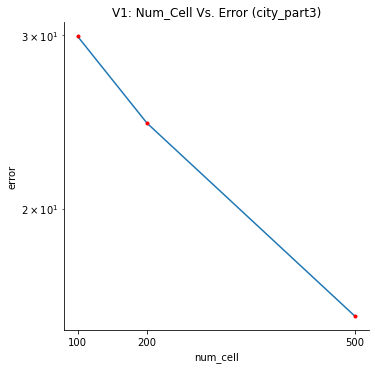

In [108]:
V1_mean_err = V1_params_df.groupby(['num_cell', 'sparse_freq', 'cell_sz', 'alp'],
                                as_index = False).agg({'error':'mean'})
line_data = V1_mean_err.groupby(['num_cell'], as_index = False).agg({'error':'min'})
fig = sns.relplot(x = line_data['num_cell'], y = line_data['error'], kind='line')
plt.title("V1: Num_Cell Vs. Error ({img})".format(img = img_nm))
plt.xticks(line_data['num_cell'])
fig.set(yscale = 'log')
plt.plot(line_data['num_cell'], line_data['error'], 'r.')
plt.show()

In [109]:
#V1 Data processing
V1_min_mean_err_df = pd.DataFrame()
for i in V1_mean_err['num_cell'].unique():
    V1_temp = V1_mean_err.loc[V1_mean_err['num_cell'] == i]
    #hyperparameter for each number of cell
    ## Grabbing values by each values
    V1_min_mean_err_df = V1_min_mean_err_df.append(V1_temp.loc[V1_temp['error'] == V1_temp['error'].min()])
    
# Merge two data to extract
V1_min_mean_err_df = V1_min_mean_err_df.rename(columns={'error' : 'mean_err'})
V1_merged_df = pd.merge(V1_params_df, V1_min_mean_err_df, on = ['num_cell', 'sparse_freq', 'cell_sz', 'alp'], how = 'left')
V1_plotting_data = V1_merged_df.loc[V1_merged_df['mean_err'].notnull()]


<Figure size 1080x1080 with 0 Axes>

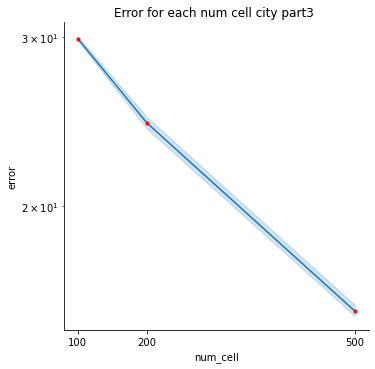

In [110]:
plt.figure(figsize=(15, 15))
save_path = 'result/{img}/V1'.format(img = img_nm)
V1_fig = sns.relplot(data = V1_plotting_data, x = 'num_cell', y = 'error', kind='line',
                     palette='Accent', legend = False)
# sns.boxplot(data = plotting_data, x = 'num_cell', y = 'error')
title = 'Error_for_each_num_cell_{img}_'.format(img = img_nm)
V1_fig.set(title= title.replace('_', ' '))
plt.xticks(line_data['num_cell'])
V1_fig.set(yscale = 'log')
plt.plot(line_data['num_cell'], line_data['error'], 'r.')
fig.savefig(os.path.join(save_path, title + "_".join(
    str.split(time.ctime().replace(":", "_"))) + ".png"), dpi = 200)

plt.show()


## Process Classical Data

In [111]:
load_classical = './result/{img}/Classical/Classical_Param_Tue_Jul_12_11_52_48_2022.csv'.format(img = img_nm)
classical_param_df = pd.read_csv(load_classical)
for index in classical_param_df.columns:
    if (index == 'Unnamed: 0') :
        classical_param_df.drop('Unnamed: 0', axis = 1, inplace=True)

In [112]:
classical_param_df

,classical_samp,alpha,repetition,error
0,100,0.001,0,143.645646
1,200,0.001,0,143.574061
2,500,0.001,0,143.494568
3,100,0.010,0,143.729759
4,200,0.010,0,143.657552
...,...,...,...,...
205,200,100.000,9,143.886985
206,500,100.000,9,143.886985
207,100,1000.000,9,143.886985
208,200,1000.000,9,143.886985


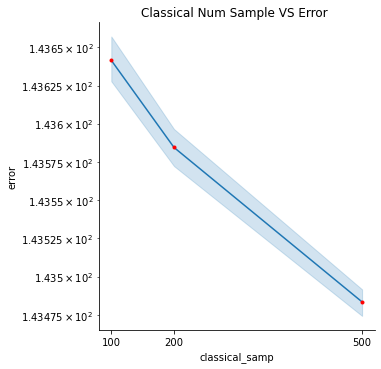

In [105]:
save_path = 'result/{img}/Classical/'.format(img = img_nm)

classical_param_mean_df = classical_param_df.groupby(
    ['alpha', 'classical_samp'], as_index=False).mean().drop('repetition', axis=1) 

classical_param_min_df = classical_param_mean_df.groupby('classical_samp', as_index=False).min('error').rename(
    columns={'error' : 'mean_err'})

classical_merged_df = pd.merge(classical_param_df, classical_param_min_df, on=['alpha', 'classical_samp'], how='left')
classical_plotting_data = classical_merged_df.loc[classical_merged_df['mean_err'].notnull()]

classical_fig = sns.relplot(data = classical_plotting_data, x = 'classical_samp', y = 'error', kind= 'line')
classical_fig.set(yscale='log')
plt.plot(classical_param_min_df['classical_samp'].unique(), classical_param_min_df['mean_err'], 'r.')
title = 'Classical_Num_Sample_VS_Error_'
plt.title(title.replace('_', ' '))
plt.xticks(classical_param_df['classical_samp'].unique())
plt.show()

classical_fig.savefig(os.path.join(save_path, title + "_".join(
    str.split(time.ctime().replace(":", "_"))) + ".png"), dpi = 200)

## Adding both lines in One Figure

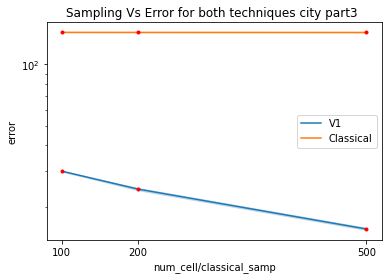

In [113]:
save_path = 'result/{img}/'.format(img = img_nm)
V1_err = sns.lineplot(data = V1_plotting_data, x = 'num_cell', y = 'error', palette='Accent', legend = False)
Classical_err = sns.lineplot(data = classical_plotting_data, x = 'classical_samp', y = 'error')
plt.yscale('log')
plt.xticks(line_data['num_cell'])
plt.plot(line_data['num_cell'], line_data['error'], 'r.') # for V1 numcell location
plt.plot(classical_param_min_df['classical_samp'].unique(), classical_param_min_df['mean_err'], 'r.') #For classical samp location
plt.xlabel('num_cell/classical_samp')
title = "Sampling_Vs_Error_for_both_techniques_{img}_".format(img = img_nm)
plt.title(title.replace('_', ' '))
plt.legend(['V1', 'Classical'], loc = 'center right')
plt.savefig(os.path.join(save_path, title + "_".join(
    str.split(time.ctime().replace(":", "_"))) + ".png"), dpi = 200)